## Question 3

## a. Eikonal solver using Level Set method

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

# A function calculates steady state solution for phi1.
def levelset(Fn,h,xD,yD):
    n = int(round(1./h))
    N=(n+1)**2
    k=h/2
    x, y = np.meshgrid(h * np.arange(n + 1), h * np.arange(n + 1))
    l=int(round(xD/h))
    m=int(round(yD/h))
    phi0 = np.zeros((n+1,n+1))
    phi1 = np.zeros((n+1,n+1))
    phi0[l,m]=0
    phi1[l,m]=0
    phi1[n/2,n/2]=1
    D=np.abs(np.max(phi1-phi0))
    phi1[n/2,n/2]=0
    
    while (D>0.00001):
        for i in range(0,n+1):
            for j in range(0,n+1):
                if (i != l or j != m):
                    Max=np.maximum(0,Fn(x[i,j], y[i,j]))
                    Min=np.minimum(0,Fn(x[i,j], y[i,j]))
                    if i!=0:
                        dx=(phi0[i,j]-phi0[i-1,j])/h
                    else:
                        dx=0
                    if i!=n:
                        Dx=(phi0[i+1,j]-phi0[i,j])/h
                    else:
                        Dx=0
                    if j!=0:
                        dy=(phi0[i,j]-phi0[i,j-1])/h
                    else:
                        dy=0
                    if j!=n:
                        Dy=(phi0[i,j+1]-phi0[i,j])/h
                    else:
                        Dy=0
                    Dpls=np.sqrt((np.maximum(0,dx))**2+(np.minimum(0,Dx))**2+(np.maximum(0,dy))**2+(np.minimum(0,Dy))**2)
                    Dmns=np.sqrt((np.maximum(0,dx))**2+(np.minimum(0,Dx))**2+(np.maximum(0,dy))**2+(np.minimum(0,Dy))**2)
                    phi1[i,j]=phi0[i,j]-k*(Max*Dpls+Min*Dmns)+k
        D=np.abs(np.max(phi1-phi0))
        phi0= phi1.copy()
    return phi1

## b. path finding function

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Function that finds the path between point D and A
def pathfinder(xA,yA,xD,yD,h,phi1):
    k=h/4 #delta t
    xp=xA
    yp=yA
    plt.plot(xp,yp,'bo')
    while (np.abs(xp-xD)>h/2 or np.abs(yp-yD)>h/2):
        l=int((xp/h))
        m=int((yp/h))
        hx1=xp-x[l,m]
        hx2=x[l+1,m]-xp
        hy1=yp-y[l,m]
        hy2=y[l,m+1]-yp
        phip=(phi1[l,m]*hx2*hy2+phi1[l+1,m]*hx1*hy2+phi1[l,m+1]*hx2*hy1+phi1[l+1,m+1]*hx1*hy1)/h**2
        if (hx1!=0):
            dx=(phip-(phi1[l,m]*hy2+phi1[l,m+1]*hy1)/h)/hx1
        else:
            dx=0
        if (hx2!=0):
            Dx=((phi1[l+1,m]*hy2+phi1[l+1,m+1]*hy1)/h-phip)/hx2
        else:
            Dx=0
        if (hy1!=0):
            dy=(phip-(phi1[l,m]*hx2+phi1[l+1,m]*hx1)/h)/hy1
        else:
            dy=0
        if (hy2!=0):
            Dy=((phi1[l,m+1]*hx2+phi1[l+1,m+1]*hx1)/h-phip)/hy2
        else:
            Dy=0
        gx=dx+Dx
        gy=dy+Dy
        G=np.sqrt((gx)**2+(gy)**2)
        xp=xp-k*gx/G
        yp=yp-k*gy/G
        plt.plot(xp,yp,'bo')
        plt.axis('equal')
    return [xp,yp]

## C.

## Case 1

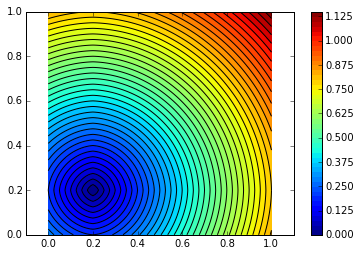

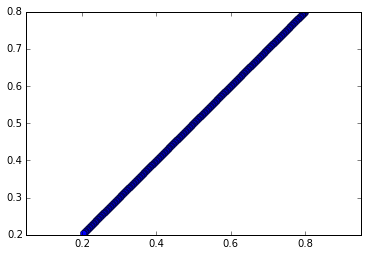

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

h = 1.0 / 100
n = int(round(1./h))
x, y = np.meshgrid(h * np.arange(n + 1), h * np.arange(n + 1))

xD=0.2
yD=0.2
xA=0.8
yA=0.8
# Velocity function
Fn = lambda x,y: 1.+x*0
# Solving the equation
phi1=levelset(Fn,h,xD,yD)

x=x.T
y=y.T
phi1=phi1.T
cset1 = plt.contourf(x, y, phi1, 50)
plt.colorbar()
plt.contour(x, y, phi1, cset1.levels, hold='on', colors='k',linewidth=0.1)
plt.axis('equal')
plt.show()

# Path finding function call
xs=pathfinder(xA,yA,xD,yD,h,phi1)

## Case 2

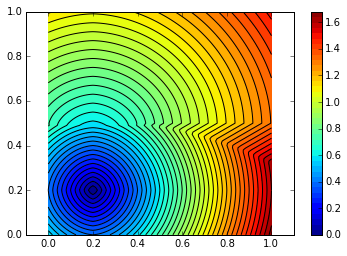

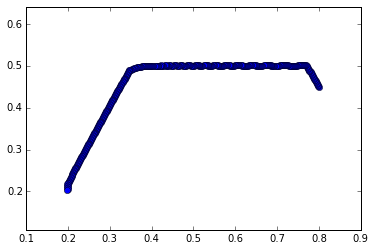

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
h = 1.0 / 100
n = int(round(1./h))
x, y = np.meshgrid(h * np.arange(n + 1), h * np.arange(n + 1))

xD=0.2
yD=0.2
xA=0.8
yA=0.45

# Velocity function
Fn=lambda x,y: 0.5+x*0 if y<0.5 else 1.+x*0
# Solving the equation
phi1=levelset(Fn,h,xD,yD)

x=x.T
y=y.T
phi1=phi1.T
cset1 = plt.contourf(x, y, phi1, 50)
plt.colorbar()
plt.contour(x, y, phi1, cset1.levels, hold='on', colors='k',linewidth=0.1)
plt.axis('equal')
plt.show()

# Path finding function call
xs=pathfinder(xA,yA,xD,yD,h,phi1)

## Case 3

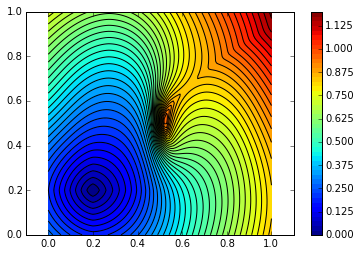

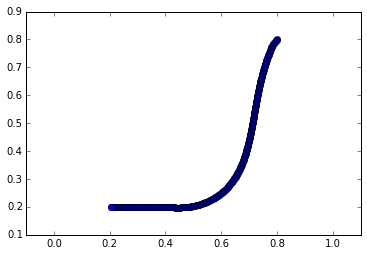

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
h = 1.0 / 100
n = int(round(1./h))
x, y = np.meshgrid(h * np.arange(n + 1), h * np.arange(n + 1))

xD=0.2
yD=0.2
xA=0.8
yA=0.8
# Velocity function
Fn = lambda x,y: 1-0.9*np.cos(4*np.pi*x)*np.exp(-10*((x-0.5)**2+(y-0.5)**2))
# Solving the equation
phi1=levelset(Fn,h,xD,yD)

x=x.T
y=y.T
phi1=phi1.T
cset1 = plt.contourf(x, y, phi1, 50)
plt.colorbar()
plt.contour(x, y, phi1, cset1.levels, hold='on', colors='k',linewidth=0.1)
plt.axis('equal')
plt.show()

# Path finding function call
xs=pathfinder(xA,yA,xD,yD,h,phi1)